In [1]:
'''We have a data set indicating names age and their respective income we 
need to see if we can get any insight from our data base'''

'We have a data set indicating names age and their respective income we \nneed to see if we can get any insight from our data base'

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler  
%matplotlib inline

In [28]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000.0
1,Michael,29,90000.0
2,Mohan,29,61000.0
3,Ismail,28,60000.0
4,Kory,42,150000.0


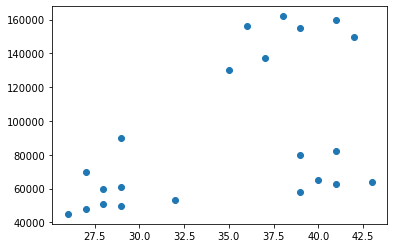

In [29]:
plt.scatter(df["Age"],df["Income($)"])

In [30]:
#Now as we can see there are 3 clusters, therefore we will pass the value 3 for K in our model

In [31]:
km = KMeans(n_clusters=3)

In [32]:
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict 

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [33]:
df['cluster'] = y_predict 

In [34]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000.0,2
1,Michael,29,90000.0,2
2,Mohan,29,61000.0,0
3,Ismail,28,60000.0,0
4,Kory,42,150000.0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


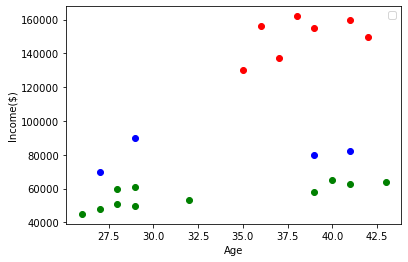

In [35]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color = "green")
plt.scatter(df2.Age,df2['Income($)'],color = "red")
plt.scatter(df3.Age,df3['Income($)'],color = "blue")

plt.xlabel("Age")
plt.ylabel('Income($)')
plt.legend()

In [36]:
''' Now as we can see the red cluster is okay 
 but the green and the blue one are not this is because of uneven scalling of the axis,
 to avoid such problems we use MinMax Scaler form sklearn library '''

' Now as we can see the red cluster is okay \n but the green and the blue one are not this is because of uneven scalling of the axis,\n to avoid such problems we use MinMax Scaler form sklearn library '

In [40]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[["Age"]])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [45]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income($)']])
df['clusters'] = y_predict
df.head()

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income($)')

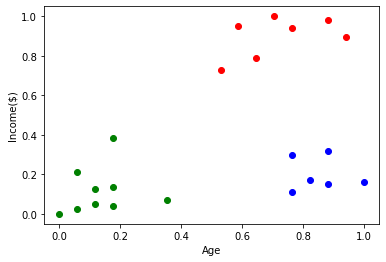

In [48]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1.Age,df1['Income($)'],color = "green")
plt.scatter(df2.Age,df2['Income($)'],color = "red")
plt.scatter(df3.Age,df3['Income($)'],color = "blue")

plt.xlabel("Age")
plt.ylabel('Income($)')


In [49]:
#Now as we can see MaxMin Scaler has done its job and we have 3 clusters

In [53]:
centroid = km.cluster_centers_
centroid

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [51]:
#this will give us the centroid points of all the clusters

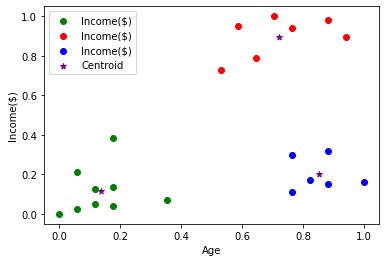

In [59]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1.Age,df1['Income($)'],color = "green",label="Income($)")
plt.scatter(df2.Age,df2['Income($)'],color = "red",label="Income($)")
plt.scatter(df3.Age,df3['Income($)'],color = "blue",label="Income($)")
plt.scatter(centroid[:,0],centroid[:,1],color="purple",marker='*',label="Centroid")

plt.xlabel("Age")
plt.ylabel('Income($)')
plt.legend()


In [60]:
#Now let see if k = 3 is a optimal solution or not

In [61]:
# we will have the find the sum sqaured error for every k from 1 to 10 and then we'll see if we can find a elbow point

In [67]:
sse = []

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)
    #km.interia_ gives us the sse for that value of k
sse

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.26640301246684145,
 0.2203764169077066,
 0.17355596555312638,
 0.13949051988045863,
 0.10188787724979426]

Text(0, 0.5, 'Sum of Squared Error')

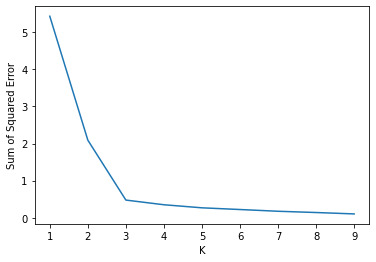

In [68]:
plt.plot(range(1,10),sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")

In [69]:
#We can clearly see the elbow point to be 3 therefore our prediction model was accurate as we chosed the optimal value for k